<a href="https://colab.research.google.com/github/andleebGhazal/Deep-learning/blob/main/CIFAR10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt


(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

# Normalize pixel values between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0



In [5]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
# model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(32, (3, 3), activation='relu'))
# model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Conv2D(64, (7, 7), activation='relu'))
model.add(layers.Conv2D(64, (7, 7), activation='relu'))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Conv2D(64, (7, 7), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 conv2d_4 (Conv2D)           (None, 28, 28, 32)        9248      
                                                                 
 conv2d_5 (Conv2D)           (None, 26, 26, 64)        18496     
                                                                 
 conv2d_6 (Conv2D)           (None, 20, 20, 64)        200768    
                                                                 
 conv2d_7 (Conv2D)           (None, 14, 14, 64)        200768    
                                                                 
 conv2d_8 (Conv2D)           (None, 12, 12, 64)        36928     
                                                                 
 conv2d_9 (Conv2D)           (None, 6, 6, 64)         

In [6]:
model.compile(optimizer='adam', loss='SparseCategoricalCrossentropy', metrics=['accuracy'])

In [7]:
history = model.fit(train_images, train_labels, epochs=10, validation_data=(test_images, test_labels))

Epoch 1/10
1563/1563 [==============================] - 1224s 781ms/step - loss: 1.7727 - accuracy: 0.3336 - val_loss: 1.5262 - val_accuracy: 0.4252
Epoch 2/10
1563/1563 [==============================] - 1224s 783ms/step - loss: 1.4127 - accuracy: 0.4813 - val_loss: 1.2784 - val_accuracy: 0.5351
Epoch 3/10
1563/1563 [==============================] - 1226s 784ms/step - loss: 1.2344 - accuracy: 0.5566 - val_loss: 1.2200 - val_accuracy: 0.5694
Epoch 4/10
1563/1563 [==============================] - 1195s 765ms/step - loss: 1.1327 - accuracy: 0.5955 - val_loss: 1.1485 - val_accuracy: 0.5981
Epoch 5/10
1563/1563 [==============================] - 1166s 746ms/step - loss: 1.0504 - accuracy: 0.6236 - val_loss: 1.0502 - val_accuracy: 0.6304
Epoch 6/10
1563/1563 [==============================] - 1167s 747ms/step - loss: 0.9845 - accuracy: 0.6481 - val_loss: 1.0384 - val_accuracy: 0.6303
Epoch 7/10
1563/1563 [==============================] - 1187s 759ms/step - loss: 0.9310 - accuracy: 0.6683

313/313 - 54s - loss: 0.9933 - accuracy: 0.6663 - 54s/epoch - 172ms/step


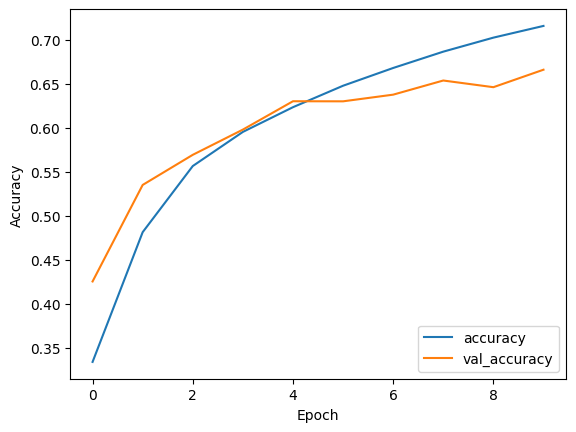

In [8]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

313/313 - 54s - loss: 0.9933 - accuracy: 0.6663 - 54s/epoch - 173ms/step


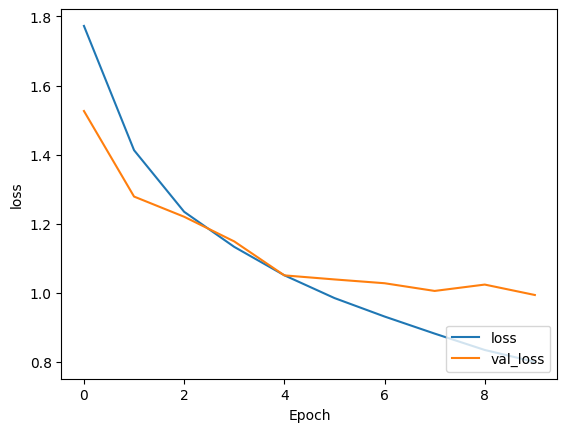

In [9]:
)plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('loss')
# plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)